In [145]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import pearsonr
from bioinfokit.visuz import cluster
import seaborn as sns
import matplotlib.pyplot as plt
import pca as pc_analysis

# local code
from source.get_elements      import get_elements

In [59]:
data = pd.read_csv("../data/interim/data_analysis_ready.csv") # load compositional data prepared for analysis

In [99]:
elements = get_elements(data.columns)

data_log_transformed = data.copy()
data_log_transformed[elements] = np.log10(data[elements])

In [87]:
# mean = data_log_transformed[elements].mean()
# std = data_log_transformed[elements].std()
# data_log_transformed_centered = data_log_transformed.copy()
# data_log_transformed_centered[elements] = (data_log_transformed[elements] - mean) / std

In [100]:
data_log_transformed

,Unnamed: 0,sample_id,As,Ba,Ca,Cu,Fe,K,Mn,P,...,Rb,Sr,Ti,V,Zn,Nb,Y,La,Nd,comments
0,15,GR1-009,1.146128,2.743510,4.000000,1.267172,4.553883,4.075912,3.029384,2.968483,...,1.853698,2.509203,3.589950,1.876218,2.251638,1.206826,1.170262,1.681241,1.369216,NaN
1,17,GR1-013,1.338456,2.594393,4.269513,1.267172,4.643453,3.789581,3.429752,3.195900,...,1.644439,3.039017,3.697229,2.009451,2.310693,1.539076,1.371068,1.886491,1.322219,NaN
2,18,TE2-005,1.359835,2.793790,3.986772,1.408240,4.712650,4.164650,4.303628,3.155336,...,2.141763,2.478566,3.744293,2.247728,2.503109,2.517724,1.649335,1.924279,1.481443,NaN
3,19,TE2-018,1.392697,2.397940,4.328380,1.770852,4.450249,3.143015,3.334454,2.929419,...,1.650308,2.671173,3.367356,1.784617,2.408240,1.522444,1.720159,1.799341,1.307496,NaN
4,20,TE2-024,0.826075,2.676694,3.924279,1.089905,4.521138,4.037825,2.462398,2.863323,...,1.650308,2.482874,3.526339,1.710963,1.602060,1.206826,1.064458,1.000000,1.093422,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,190,TE2-054,1.541579,2.598791,4.488551,1.579784,4.961421,3.902003,3.499687,3.340444,...,1.593286,2.933487,4.117271,2.478278,2.492621,1.806180,1.614897,1.681241,1.332438,NaN
125,191,TE2-051,1.495544,2.637490,4.511883,1.421604,4.954243,3.931458,3.255273,3.523746,...,1.813581,3.111263,4.166430,2.439964,2.339849,2.025306,1.769377,1.934498,1.004321,NaN
126,192,GR1-053,1.045323,2.658965,4.372912,1.143015,4.860937,4.042182,3.276462,3.336460,...,1.729974,2.866878,3.954243,2.281488,2.418798,2.042969,1.856124,2.012837,1.387390,added this entry after reviewing XRF data file...
127,193,TE2-009,1.086360,2.669317,4.075547,1.301030,4.596597,4.133539,2.875061,3.120574,...,1.859739,2.694605,3.683047,1.967080,1.975432,1.630428,1.387390,1.770852,1.432969,bag unlabelled; we believe it is TE2-009 as th...


In [144]:
pca = PCA()

In [157]:
pca_results = pca.fit(data_log_transformed[elements])
data_pca = data.copy()
data_pca[elements] = pca.transform(data_log_transformed[elements])

# replace headers 
columns = data.columns
i=1
cols=[]
for column in columns: 
    if column in elements:
        cols.append("PC"+str(i))
        i+=1
    else: 
        cols.append(column)

data_pca.columns = cols
data_pca.head()

,Unnamed: 0,sample_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,comments
0,15,GR1-009,0.513455,0.086349,-0.496007,0.103840,-0.213691,0.071633,-0.274877,-0.034938,...,-0.177220,0.008093,-0.003433,-0.040795,0.062648,-0.168792,-0.013063,0.003634,-0.049933,NaN
1,17,GR1-013,-0.331760,0.153724,-0.060872,0.150487,-0.277528,-0.062265,-0.264351,-0.095156,...,0.050559,-0.033271,-0.027968,0.125536,0.040385,-0.000453,0.055132,-0.359896,0.003298,NaN
2,18,TE2-005,-1.101869,0.970351,-0.760108,-0.306355,0.160438,-0.376801,0.037369,-0.199377,...,-0.021424,-0.068787,0.048359,-0.022656,-0.024469,0.388110,-0.133117,0.081515,0.227803,NaN
3,19,TE2-018,-0.178455,0.708221,0.219856,0.851769,-0.351781,0.090879,0.134108,-0.016947,...,0.052124,0.055970,0.111676,-0.117424,-0.011360,-0.170257,0.019278,-0.145407,-0.107321,NaN
4,20,TE2-024,1.435801,-0.421518,-0.258297,0.016297,-0.116064,-0.101153,0.284257,0.142801,...,0.069822,0.051752,-0.117392,0.005023,-0.062801,-0.126085,-0.023157,0.111176,-0.075496,NaN


In [103]:
var = pca_results.explained_variance_ratio_
cum_var = np.cumsum(var)
print(cum_var)

[0.41634097 0.56975045 0.70719569 0.77802834 0.83132275 0.86931683
 0.9043663  0.92463442 0.94208039 0.95714854 0.96965684 0.97885885
 0.98456586 0.9891195  0.99302643 0.99614234 0.99835699 1.        ]


In [165]:
loadings = pca_results.components_
pc_list = ["PC"+str(i) for i in list(range(1, pca_results.n_features_ + 1))]
loadings = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings["element"] = elements
loadings.set_index("element", inplace=True)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
element,,,,,,,,,,,,,,,,,,
As,-0.170189,0.330294,0.381600,-0.249019,-0.149945,0.003616,-0.036860,-0.270382,-0.114219,0.006401,0.437510,-0.516342,-0.174275,-0.195797,0.092897,-0.085581,0.024203,0.031485
Ba,0.002782,-0.116582,-0.178728,-0.138085,-0.110466,0.190578,-0.207784,-0.059524,0.328221,0.037430,0.015314,-0.081163,-0.243160,0.075455,-0.194614,-0.378982,-0.670499,-0.168245
Ca,-0.265365,-0.281071,0.004311,0.052353,-0.203639,0.124441,-0.166141,0.103238,-0.248172,-0.189321,0.078064,0.138976,0.445063,-0.391585,0.378709,-0.348836,-0.108965,-0.036947
Cu,-0.131597,0.203742,0.059027,0.186651,-0.395230,0.586966,0.380389,0.316517,0.035380,0.291183,-0.211792,-0.138718,-0.000386,0.010534,0.044097,0.070235,-0.008234,-0.006311
Fe,-0.205528,-0.185561,0.007371,-0.106048,0.003114,-0.117423,0.229979,-0.128237,-0.258754,-0.085477,-0.052198,-0.153660,0.085729,0.311107,0.274374,0.482860,-0.408291,-0.386036
K,0.045297,-0.071935,-0.513473,-0.524353,0.042344,0.304835,0.129008,-0.098385,0.047100,-0.043572,0.154902,0.010662,0.090185,-0.382153,-0.116347,0.347319,0.062339,0.112603
La,-0.250362,0.055818,-0.058946,0.283787,0.490802,0.368368,-0.218032,-0.503202,-0.049752,0.106896,-0.340617,-0.156912,0.018070,-0.088411,0.072706,0.016237,0.011845,0.066969
Mn,-0.434687,0.243873,-0.453475,0.189391,-0.266155,-0.466502,-0.106708,0.007774,0.327151,0.070312,-0.101561,-0.220228,0.122105,-0.074831,0.049697,0.093675,0.028981,0.082307
Nb,-0.332090,0.192858,0.126070,-0.346051,0.506940,-0.128322,-0.035097,0.554341,-0.068057,0.221886,-0.155583,0.004046,-0.021445,-0.165085,-0.046954,-0.065822,-0.116834,-0.094383


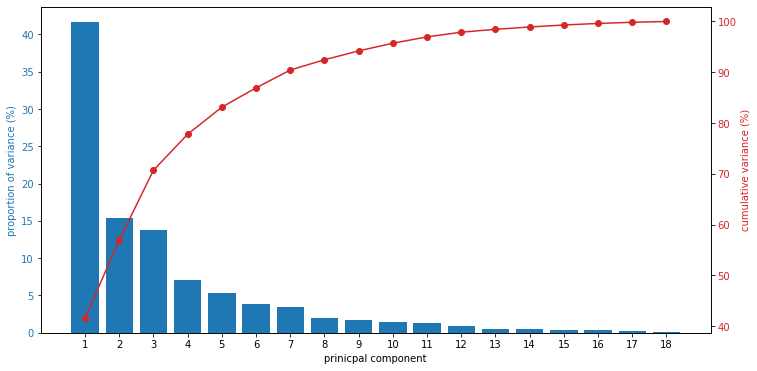

In [139]:
fig1, ax1 = plt.subplots(figsize=(12,6))

color1 = "tab:blue"
ax1.bar([str(x) for x in range(1,len(pc_list)+1)], 100*var, color=color1)
ax1.set_xlabel("prinicpal component")
ax1.set_ylabel("proportion of variance (%)", color=color1)
ax1.tick_params(axis="y", labelcolor=color1)

color2 = "tab:red"
ax2 = ax1.twinx()
ax2.plot(100*cum_var, marker="o", color=color2)
ax2.set_ylabel("cumulative variance (%)", color=color2)
ax2.tick_params(axis="y", labelcolor=color2)

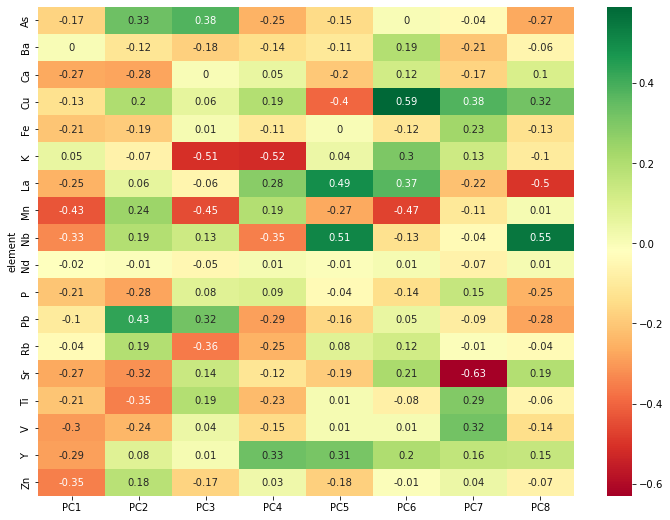

In [211]:
fig, ax = plt.subplots(figsize=(12,9))
ax = sns.heatmap(loadings.iloc[:,0:8].round(decimals=2), annot=True, cmap="RdYlGn")

plt.show()

In [206]:
data_pca_norm = data_pca.copy()
loadings_norm = loadings.copy()
for pc in pc_list:
    data_pca_norm[pc] = 2 * (data_pca[pc] - data_pca[pc].min()) / \
                        (data_pca[pc].max() - data_pca[pc].min()) - 1
    loadings_norm[pc] = 2 * (loadings[pc] - loadings[pc].min()) / \
                        (loadings[pc].max() - loadings[pc].min()) - 1

In [219]:
data_pca_norm.to_csv('../data/interim/data_pca_norm.csv')

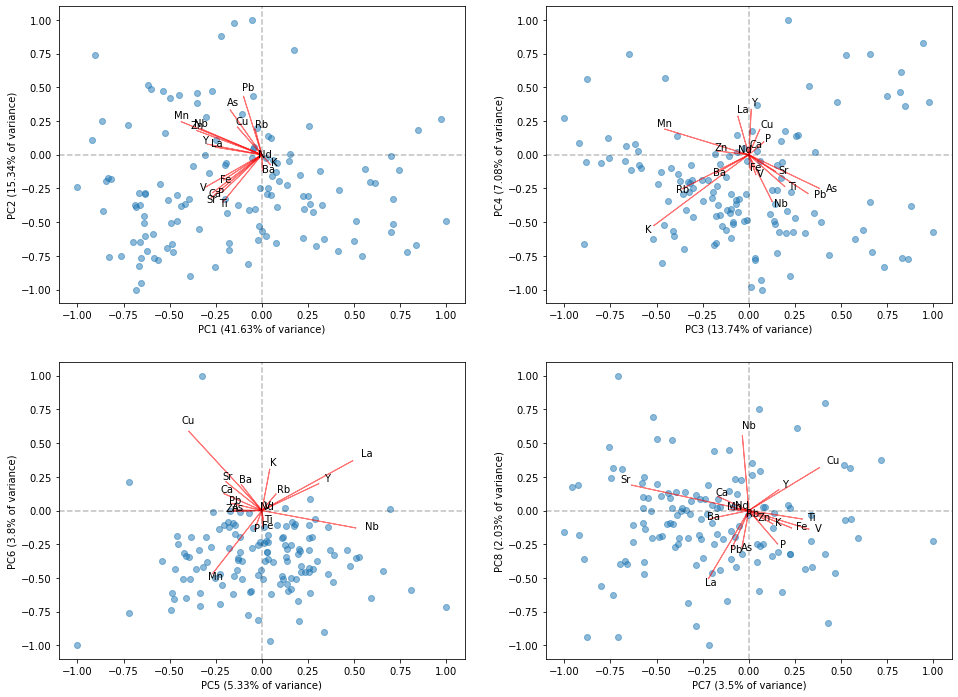

In [213]:
fig, axs = plt.subplots(2, 2, figsize=(16,12))

### biplot for PC1 and PC2
# vertical and horizontal lines through origin
axs[0,0].axvline(0, color="k", linestyle="--", alpha=0.25)
axs[0,0].axhline(0, color="k", linestyle="--", alpha=0.25)

# plot samples
axs[0,0].scatter(data_pca_norm["PC1"], data_pca_norm["PC2"], alpha=0.5)

# set axis labels
axs[0,0].set_xlabel(f"PC1 ({round(100*var[0], 2)}% of variance)")
axs[0,0].set_ylabel(f"PC2 ({round(100*var[1], 2)}% of variance)")

# loading plot
# ax2 = axs[0,0].twinx().twiny()
for element in elements:
    axs[0,0].arrow(0, 0, loadings.loc[element, "PC1"], loadings.loc[element, "PC2"], color="r", alpha=0.5)
    axs[0,0].text(loadings.loc[element, "PC1"] * 1.1, loadings.loc[element, "PC2"] * 1.1, element)


### biplot for PC3 and PC4
# vertical and horizontal lines through origin
axs[0,1].axvline(0, color="k", linestyle="--", alpha=0.25)
axs[0,1].axhline(0, color="k", linestyle="--", alpha=0.25)

# plot samples
axs[0,1].scatter(data_pca_norm["PC3"], data_pca_norm["PC4"], alpha=0.5)

# set axis labels
axs[0,1].set_xlabel(f"PC3 ({round(100*var[2], 2)}% of variance)")
axs[0,1].set_ylabel(f"PC4 ({round(100*var[3], 2)}% of variance)")

# loading plot
for element in elements:
    # axs[0,1]
    axs[0,1].arrow(0, 0, loadings.loc[element, "PC3"], loadings.loc[element, "PC4"], color="r", alpha=0.5)
    axs[0,1].text(loadings.loc[element, "PC3"] * 1.1, loadings.loc[element, "PC4"] * 1.1, element)


### biplot for PC5 and PC6
# vertical and horizontal lines through origin
axs[1,0].axvline(0, color="k", linestyle="--", alpha=0.25)
axs[1,0].axhline(0, color="k", linestyle="--", alpha=0.25)

# plot samples
axs[1,0].scatter(data_pca_norm["PC5"], data_pca_norm["PC6"], alpha=0.5)

# set axis labels
axs[1,0].set_xlabel(f"PC5 ({round(100*var[4], 2)}% of variance)")
axs[1,0].set_ylabel(f"PC6 ({round(100*var[5], 2)}% of variance)")

# loading plot
for element in elements:
    axs[1,0].arrow(0, 0, loadings.loc[element, "PC5"], loadings.loc[element, "PC6"], color="r", alpha=0.5)
    axs[1,0].text(loadings.loc[element, "PC5"] * 1.1, loadings.loc[element, "PC6"] * 1.1, element)


### biplot for PC7 and PC8
# vertical and horizontal lines through origin
axs[1,1].axvline(0, color="k", linestyle="--", alpha=0.25)
axs[1,1].axhline(0, color="k", linestyle="--", alpha=0.25)

# plot samples
axs[1,1].scatter(data_pca_norm["PC7"], data_pca_norm["PC8"], alpha=0.5)

# set axis labels
axs[1,1].set_xlabel(f"PC7 ({round(100*var[6], 2)}% of variance)")
axs[1,1].set_ylabel(f"PC8 ({round(100*var[7], 2)}% of variance)")

# loading plot
for element in elements:
    axs[1,1].arrow(0, 0, loadings.loc[element, "PC7"], loadings.loc[element, "PC8"], color="r", alpha=0.5)
    axs[1,1].text(loadings.loc[element, "PC7"] * 1.1, loadings.loc[element, "PC8"] * 1.1, element)

In [218]:
sum(loadings.loc[:, "PC1"]**2)

1.0

In [51]:
fig = px.histogram(data_log_transformed, x="V")
fig.show()

In [148]:
fig = px.histogram(data, x="V")
fig.show()

In [56]:
A = [[0.25, 0.5, 0.375], [0.5, 0.25, 0.375]]
pearsonr(A[0], A[1])


(-0.9999999999999998, 1.3415758552508151e-08)